In [26]:
import PyCESim
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi']= 150

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Firstly, let's load in a simple .xyz geometry file

In [27]:
CH2O2_geom = PyCESim.read_xyz('CH2O2.xyz')

vars(CH2O2_geom) # print information we loaded in

{'atom_coords': array([[ 0.07273702, -0.        , -0.02918775],
        [-0.14562678, -0.        ,  2.62709859],
        [ 2.14443963,  0.        , -1.18555287],
        [ 1.70009202,  0.        ,  3.17521517],
        [-1.86490837,  0.        , -0.87993075]]),
 'atom_masses': array([12.      , 15.994915, 15.994915,  1.007825,  1.007825]),
 'natoms': 5,
 'element_list': ['C', 'O', 'O', 'H', 'H']}

We can visualize the geometry simply to check it looks as we expect

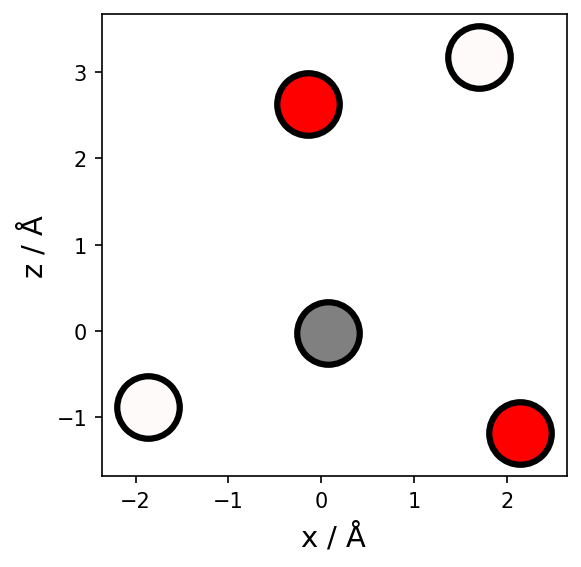

In [28]:
CH2O2_geom.visualize_2D(dim1=0,dim2=2)

Now we can move on to generating a pool of starting conditions for the CE simulations

In [4]:
geom_pool1 = PyCESim.StartingConditions(CH2O2_geom)

For the simplest simulation, now we just choose a number of simulations, and a sigma to use for Gaussian blurring of the positions of the atoms

In [5]:
n_sims=1000
geom_pool1.generate_pool(n_sims, random_rotate=False, sigma=0.1)

Visualing this pool of geometries we've generated as a 2D histogram:

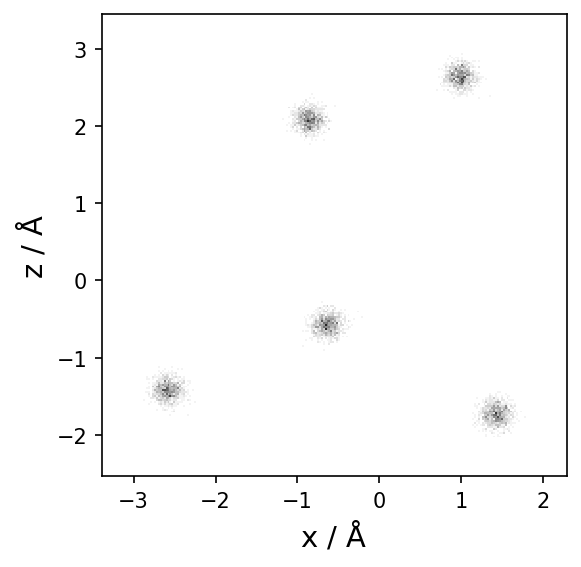

In [6]:
geom_pool1.visualize_pool_2D(dim1=0, dim2=2, vmax=50)

For most applications, we probably want the molecules to be unoriented, which we can do by randomly rotating each geometry:

In [7]:
n_sims=1000
geom_pool1.generate_pool(n_sims, random_rotate=True, sigma=0.1)

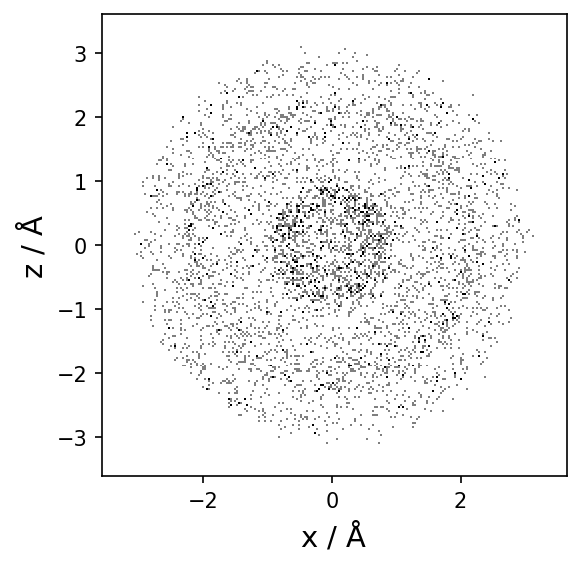

In [8]:
geom_pool1.visualize_pool_2D(dim1=0, dim2=2, vmax=500)

Once we have this pool of starting conditions, carryin out the simulation is easy, we just need to define some timesteps that will be used in numerically integrating Newton's equations. We specify a series of time ranges, and a number of timesteps in each range. This makes it easier to use fine timesteps at the earliest times in the simulation, out to quite coarse bins for the latest times. Generally using fewer bins will speed up the calculation, potentially with some loss of accuracy

In [9]:
CE_sim1 = PyCESim.CESim(geom_pool1)

In [10]:
t_range_list = [(0,100e-15),(101e-15,500e-15), (501e-15,5e-12), (5.001e-12,500e-12)]
n_step_list = [50, 50, 50, 50]

CE_sim1.make_timebins(t_range_list, n_step_list)

Now we can run the simulations.

In [11]:
CE_sim1.run_sims()

On simultion number 0!
On simultion number 100!
On simultion number 200!
On simultion number 300!
On simultion number 400!
On simultion number 500!
On simultion number 600!
On simultion number 700!
On simultion number 800!
On simultion number 900!


By default, this outputs information about the final velocities of each ion in a list, which is normally all we want. If you want to save more information about the simulations themselves (the positions and velocities at each time step), you can set 'save_all=True' in the above call to run_sims(). By default, this output list is also converted to a Pandas dataframe and stored.

In [12]:
CE_sim1.output_df

,vx_ms,vy_ms,vz_ms,charge_C,mass_kg,channel_idx,sim_counter,charge_e,mass_amu,px_SI,py_SI,pz_SI,px_AU,py_AU,pz_AU,pmag_AU,KE_eV
0,-6553.367416,1869.126633,-1370.111931,1.602177e-19,1.992647e-26,0.0,0.0,1.0,12.000000,-1.305855e-22,3.724509e-23,-2.730149e-23,-65.526926,18.689342,-13.699708,69.503608,3.004651
1,4797.157183,5357.160285,-3399.297796,1.602177e-19,2.656018e-26,0.0,0.0,1.0,15.994915,1.274134e-22,1.422871e-22,-9.028596e-23,63.935184,71.398750,-45.304900,106.009543,5.244071
2,-257.978507,-7444.906436,4751.251583,1.602177e-19,2.656018e-26,0.0,0.0,1.0,15.994915,-6.851955e-24,-1.977380e-22,1.261941e-22,-3.438266,-99.223653,63.323366,117.758243,6.470850
3,49773.554616,-20812.645310,-5051.444526,1.602177e-19,1.673533e-27,0.0,0.0,1.0,1.007825,8.329767e-23,-3.483064e-23,-8.453757e-24,41.798223,-17.477787,-4.242040,45.503399,15.334272
4,-43783.792612,31691.322285,-91.355786,1.602177e-19,1.673533e-27,0.0,0.0,1.0,1.007825,-7.327361e-23,5.303646e-23,-1.528869e-25,-36.768214,26.613348,-0.076718,45.389181,15.257388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2275.186533,-5513.195200,-3311.994302,1.602177e-19,1.992647e-26,0.0,999.0,1.0,12.000000,4.533643e-23,-1.098585e-22,-6.599635e-23,22.749523,-55.126275,-33.116533,68.214014,2.894187
4996,5911.055833,5274.326725,449.277425,1.602177e-19,2.656018e-26,0.0,999.0,1.0,15.994915,1.569987e-22,1.400871e-22,1.193289e-23,78.780917,70.294767,5.987845,105.752737,5.218695
4997,-8212.041363,-1555.507061,1911.328119,1.602177e-19,2.656018e-26,0.0,999.0,1.0,15.994915,-2.181133e-22,-4.131455e-23,5.076522e-23,-109.447815,-20.731368,25.473652,114.269510,6.093115
4998,-19991.411407,48265.485565,18978.776687,1.602177e-19,1.673533e-27,0.0,999.0,1.0,1.007825,-3.345628e-23,8.077387e-23,3.176160e-23,-16.788141,40.531795,15.937763,46.676337,16.135001


In this example, we have only included one channel - in which all atoms get 1 charge, which is the default. Adding additional channels, e.g. in which the charge on each atom is varied is easy to do. We just define a list of charges and a probability assigned to each channel, and we add this list of channels into the 'starting_conditions' object before we generate the pool of starting conditions. Other than this, running the simulation is the same.

In [13]:

ch1 = PyCESim.CEChannel([1,1,1,1,1], 0.6)
ch2 = PyCESim.CEChannel([2,1,1,1,1], 0.1)
ch3 = PyCESim.CEChannel([1,2,1,1,1], 0.1)
ch4 = PyCESim.CEChannel([1,1,2,1,1], 0.1)
ch5 = PyCESim.CEChannel([2,2,1,1,1], 0.033)
ch6 = PyCESim.CEChannel([1,2,2,1,1], 0.033)
ch7 = PyCESim.CEChannel([2,1,2,1,1], 0.033)

channel_list = [ch1,ch2,ch3,ch4,ch5,ch6,ch7]

In [14]:
geom_pool2 = PyCESim.StartingConditions(CH2O2_geom)
geom_pool2.set_channel_list(channel_list)

n_sims=1000
geom_pool2.generate_pool(n_sims, random_rotate=True, sigma=0.1)

In [15]:
CE_sim2 = PyCESim.CESim(geom_pool2)

In [16]:
t_range_list = [(0,100e-15),(101e-15,500e-15), (501e-15,5e-12), (5.001e-12,500e-12)]
n_step_list = [50, 50, 50, 50]

CE_sim2.make_timebins(t_range_list, n_step_list)

In [17]:
CE_sim2.run_sims()

On simultion number 0!
On simultion number 100!
On simultion number 200!
On simultion number 300!
On simultion number 400!
On simultion number 500!
On simultion number 600!
On simultion number 700!
On simultion number 800!
On simultion number 900!


Now if we look at the output dataframe, we will see that the charge on the atoms is not always one, and that the index of the channel is tracked, and is now no longer always 0.

In [18]:
CE_sim2.output_df

,vx_ms,vy_ms,vz_ms,charge_C,mass_kg,channel_idx,sim_counter,charge_e,mass_amu,px_SI,py_SI,pz_SI,px_AU,py_AU,pz_AU,pmag_AU,KE_eV
0,-4769.367584,-4859.332300,2500.226862,1.602177e-19,1.992647e-26,0.0,0.0,1.0,12.000000,-9.503665e-23,-9.682932e-23,4.982069e-23,-47.688765,-48.588319,24.999694,72.526049,3.271654
1,-3923.824345,6362.632550,-3096.675902,1.602177e-19,2.656018e-26,0.0,0.0,1.0,15.994915,-1.042175e-22,1.689927e-22,-8.224827e-23,-52.295645,84.799406,-41.271640,107.838407,5.426572
2,8157.364676,-3280.123866,1389.082715,1.602177e-19,2.656018e-26,0.0,0.0,1.0,15.994915,2.166611e-22,-8.712068e-23,3.689429e-23,108.719099,-43.716583,18.513310,118.632731,6.567313
3,27236.592199,46536.817405,6660.810815,1.602177e-19,1.673533e-27,0.0,0.0,1.0,1.007825,4.558133e-23,7.788088e-23,1.114708e-23,22.872410,39.080115,5.593534,45.625543,15.416705
4,-37637.908643,-37599.230803,-9329.840131,1.602177e-19,1.673533e-27,0.0,0.0,1.0,1.007825,-6.298827e-23,-6.292354e-23,-1.561379e-23,-31.607099,-31.574619,-7.834898,45.358030,15.236452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-4275.214623,-6654.424688,12055.059115,3.204353e-19,1.992647e-26,6.0,999.0,2.0,12.000000,-8.518992e-23,-1.325992e-22,2.402147e-22,-42.747744,-66.537395,120.538178,144.166733,12.927349
4996,9479.990706,2877.147311,2755.639914,1.602177e-19,2.656018e-26,6.0,999.0,1.0,15.994915,2.517902e-22,7.641755e-23,7.319029e-23,126.346693,38.345823,36.726406,137.050056,8.764701
4997,-7726.328094,2358.260227,-13388.295912,3.204353e-19,2.656018e-26,6.0,999.0,2.0,15.994915,-2.052127e-22,6.263581e-23,-3.555955e-22,-102.974363,31.430240,-178.435504,208.400596,20.266399
4998,38848.102981,47358.968173,-26086.752997,1.602177e-19,1.673533e-27,6.0,999.0,1.0,1.007825,6.501357e-23,7.925678e-23,-4.365703e-23,32.623382,39.770531,-21.906812,55.909647,23.149892


Moving on to a more 'physically-meaningful' way of generating a set of initial geometries, by Wigner sampling from the normal modes of a molecule at a given temperature T. To do this, we will load in an output file from a vibrational frequency calculation in some quantum chemistry software. For my testing I have used GAMESS but this could be extended to other software fairly easily, just let me know.

Different software may save the normal modes in slightly different formats (different normalization, mass-weighting etc.). When loading in the normal modes, we check that they are normalised as expected, and also that they are orthogonal, by calculating the dot product of each normal mode with each other, and seeing that it gives 0, except when taking the dot product with itself. This matrix of dot products (with 1 subtracted from the diagonal, such that each value should be very close to zero) is displayed by default when we load in the modes. This matrix maybe isn't too important, but text will be printed out to let you know if the normal modes look good

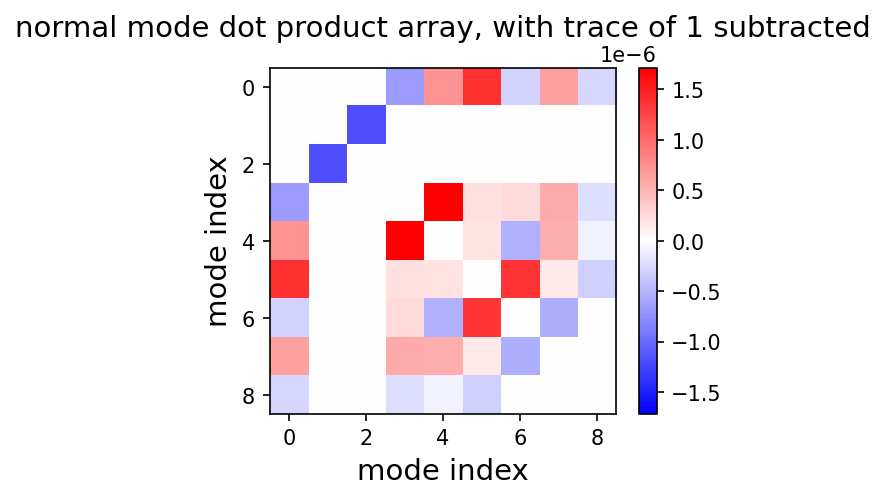

Max absolute value in subtracted dot produce matrix: 1.7160420794359865e-06
Normal modes are in expected format


In [19]:
fname = 'CH2O2_vibs.log'

CH2O2_geom2 = PyCESim.read_log(fname)

If we look closer at this geometry object we can see that there's extra information loaded in now, namely the normal modes and their frequencies

In [20]:
vars(CH2O2_geom2)

{'atom_coords': array([[ 0.03849077, -0.        , -0.01544549],
        [-0.07706237, -0.        ,  1.3902007 ],
        [ 1.13478858,  0.        , -0.62736756],
        [ 0.89964995,  0.        ,  1.68025151],
        [-0.98686701,  0.        , -0.4656393 ]]),
 'atom_masses': array([12.     , 15.99491, 15.99491,  1.00782,  1.00782]),
 'natoms': 5,
 'atom_nos': array([6, 8, 8, 1, 1], dtype=int32),
 'element_list': ['?', '?', '?', '?', '?'],
 'nmodes': array([[[-1.2071472e-01,  0.0000000e+00, -6.4443830e-02],
         [ 9.4565580e-02,  0.0000000e+00, -7.3852640e-02],
         [-8.9521100e-03,  0.0000000e+00,  1.5067786e-01],
         [ 1.7919096e-01, -0.0000000e+00, -3.5797120e-01],
         [-1.0045180e-01, -0.0000000e+00, -9.4074360e-02]],
 
        [[-0.0000000e+00,  1.0465530e-01, -0.0000000e+00],
         [ 0.0000000e+00, -8.4648180e-02, -0.0000000e+00],
         [ 0.0000000e+00, -4.8816680e-02,  0.0000000e+00],
         [ 0.0000000e+00,  8.4224918e-01, -0.0000000e+00],
         [ 

Generating our set of initial conditions is again rather simple, we just set the method to 'wigner' in our generate_pool() method. There are a few extra values to set here: the temperature T, the maximum vibrational quantum number n, and the maximum value sampled in the Wigner sampling. The default for these two values should be good for most calculations anyway. The default temperature is 0K, such that n=0 always.

In [21]:
geom_pool_wigner = PyCESim.StartingConditions(CH2O2_geom2)

n_sims=1000
geom_pool_wigner.generate_pool(n_sims, random_rotate=False, method='wigner')

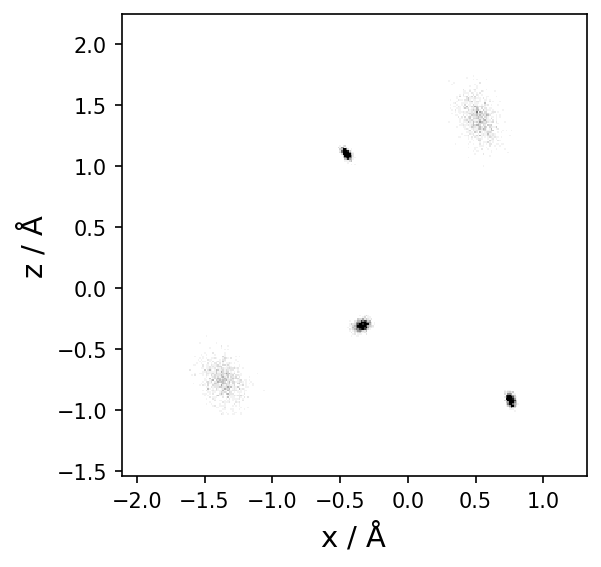

In [22]:
geom_pool_wigner.visualize_pool_2D(dim1=0, dim2=2, vmax=50)

We can now see as expected, the positional uncertainty is much greater in the hydrogens due to their light masses. By default, when doing this wigner sampling we also essentially sample initial momentum of each atom for free, which can also be included in the CE simulation (although is generally fairly small relative to the momentum gained in the CE).
If we raise the temperature, we can see the geometric structure becoming increasingly blurred, as we'd expect. 

In [23]:
n_sims=1000
geom_pool_wigner.generate_pool(n_sims, random_rotate=False, method='wigner', T=5000, nmax=25,wigner_sample_max=6)

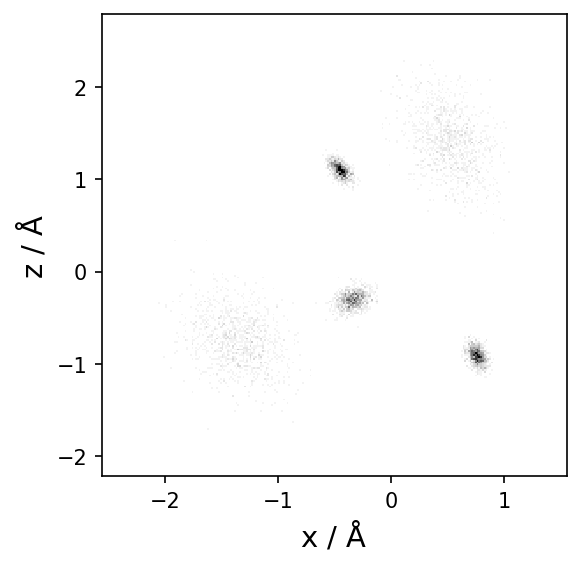

In [24]:
geom_pool_wigner.visualize_pool_2D(dim1=0, dim2=2, vmax=50)

Especially if sampling with elevated temperatures like the above, it's probably good to check that your values of nmax and wigner_sample_max are good, by histogramming the two and seeing that you aren't artificially cutting these distributions off very prematurely:

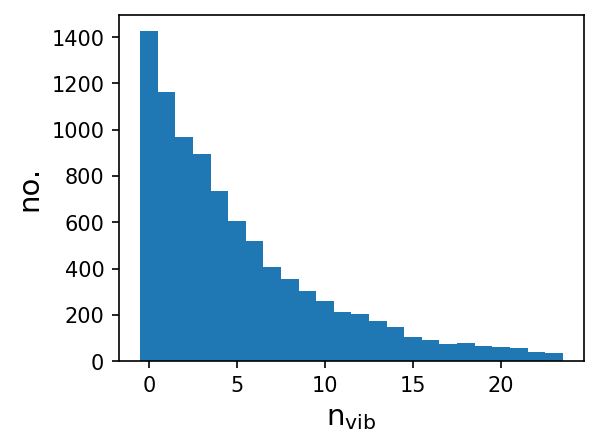

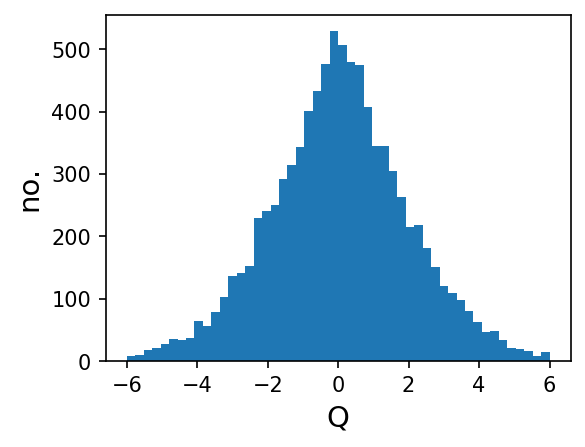

In [25]:
geom_pool_wigner.wigner_histograms()

Including additional Coulomb explosion channels and running the simulations etc. works exactly the same regardless of how the initial sampling of position is carried out

